In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/My Drive/

/content/drive/My Drive


In [3]:
import numpy as np
import pandas as pd
import os

from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
train = pd.read_table('liar_dataset/train.tsv', names = ['id','label','statement','subject','speaker','job','state',
                                    'party','barely_true_c','false_c','half_true_c','mostly_true_c',
                                    'pants_on_fire_c','venue'])

valid = pd.read_table('liar_dataset/valid.tsv', names = ['id','label','statement','subject','speaker','job','state',
                                    'party','barely_true_c','false_c','half_true_c','mostly_true_c',
                                    'pants_on_fire_c','venue'])

test = pd.read_table('liar_dataset/test.tsv', names = ['id','label','statement','subject','speaker','job','state',
                                    'party','barely_true_c','false_c','half_true_c','mostly_true_c',
                                    'pants_on_fire_c','venue'])

combined = pd.concat([train, valid, test]).reset_index()

In [5]:
combined

,index,id,label,statement,subject,speaker,job,state,party,barely_true_c,false_c,half_true_c,mostly_true_c,pants_on_fire_c,venue
0,0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12786,1262,7334.json,half-true,Says his budget provides the highest state fun...,education,rick-scott,Governor,Florida,republican,28.0,23.0,38.0,34.0,7.0,a news conference
12787,1263,9788.json,barely-true,Ive been here almost every day.,"civil-rights,crime,criminal-justice",jay-nixon,Governor,Missouri,democrat,2.0,0.0,0.0,1.0,0.0,"on ABC's ""This Week"""
12788,1264,10710.json,barely-true,"In the early 1980s, Sen. Edward Kennedy secret...","bipartisanship,congress,foreign-policy,history",mackubin-thomas-owens,"senior fellow, Foreign Policy Research Institute",Rhode Island,columnist,1.0,0.0,0.0,0.0,0.0,a commentary in The Providence Journal
12789,1265,3186.json,barely-true,Says an EPA permit languished under Strickland...,"environment,government-efficiency",john-kasich,"Governor of Ohio as of Jan. 10, 2011",Ohio,republican,9.0,8.0,10.0,18.0,3.0,a news conference


In [6]:
combined['label'].value_counts()

half-true      2627
false          2507
mostly-true    2454
barely-true    2103
true           2053
pants-fire     1047
Name: label, dtype: int64

In [7]:
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
#print(stop_words)

# Tokenization, Lemmatization, and Stop Word Removal
def preprocess_statement(statement):
    stop_words = set(nltk.corpus.stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    tokenized_statement = nltk.word_tokenize(statement)
    tokenized_statement = [t for t in tokenized_statement if t not in stop_words]

    for idx, token in enumerate(tokenized_statement):
        """
        if token.lower() in stop_words:
            tokenized_statement[idx] = '#'
            continue
        """    
        tokenized_statement[idx] = lemmatizer.lemmatize(token)
    #print("Old Statement:", statement)
    #print("New Statement:", tokenized_statement)
        
    return tokenized_statement

#combined['statement'].apply(preprocess_statement)

In [8]:
combined['statement_preprocessed'] = combined['statement'].apply(preprocess_statement)
train['statement_preprocessed'] = train['statement'].apply(preprocess_statement)
valid['statement_preprocessed'] = valid['statement'].apply(preprocess_statement)
test['statement_preprocessed'] = test['statement'].apply(preprocess_statement)

In [9]:
import matplotlib.pyplot as plt

def word_cloud_pic(statement):
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(statement)
 
    # plot the WordCloud image                      
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()
    
def word_cloud_before_after(statement):
    word_cloud_pic(statement)
    ps = preprocess_statement(statement)
    ps = [t for t in ps if t != '#']
    word_cloud_pic(" ".join(ps))

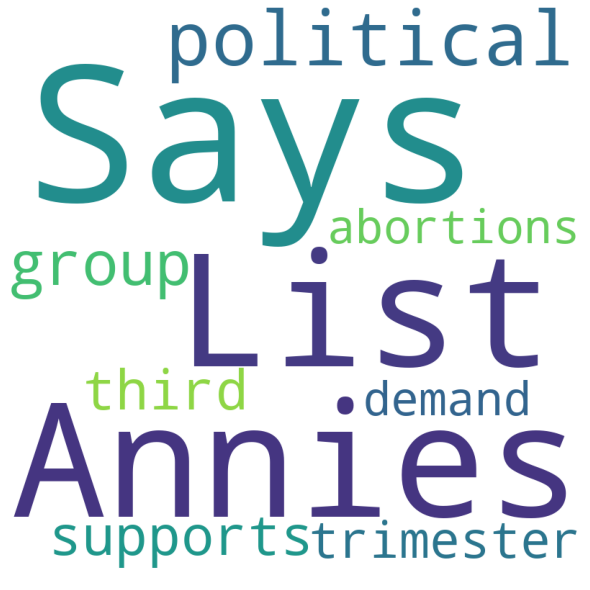

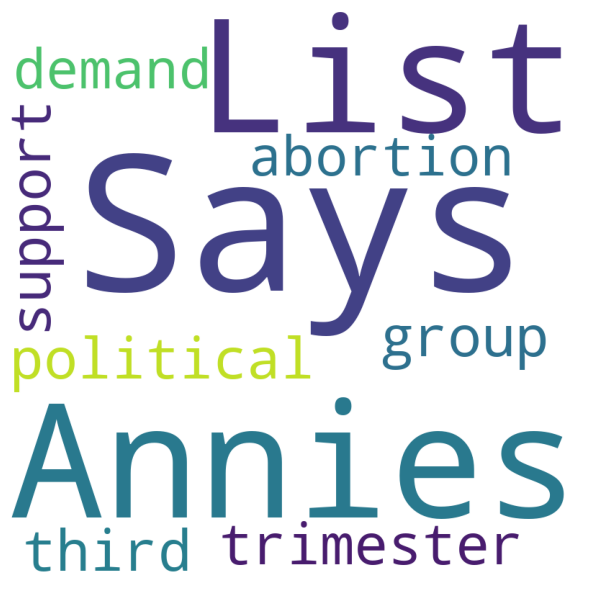

In [10]:
word_cloud_before_after(combined.loc[0, 'statement'])

In [11]:
combined['label'].value_counts()

half-true      2627
false          2507
mostly-true    2454
barely-true    2103
true           2053
pants-fire     1047
Name: label, dtype: int64

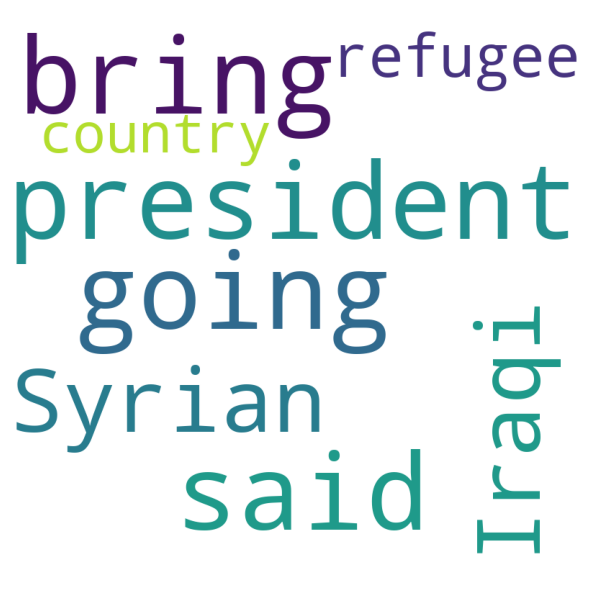

In [12]:
word_cloud_pic(" ".join(combined[combined['label'] == 'pants-fire'].reset_index().loc[10, 'statement_preprocessed']))

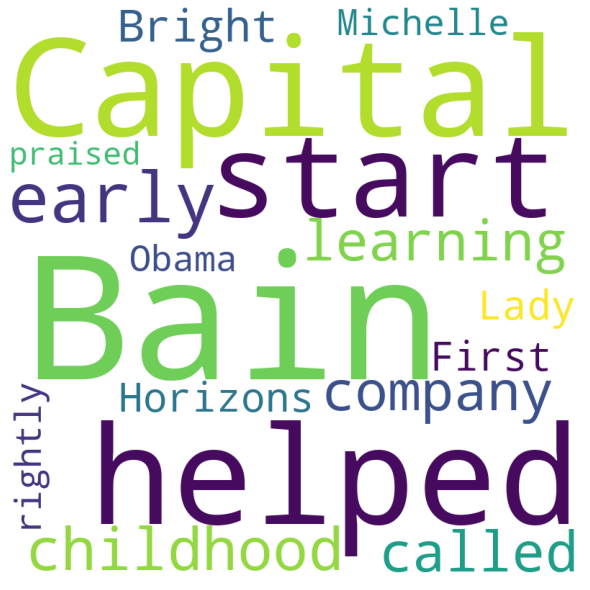

In [13]:
word_cloud_pic(" ".join(combined[combined['label'] == 'true'].reset_index().loc[10, 'statement_preprocessed']))

In [14]:
combined['statement']

0        Says the Annies List political group supports ...
1        When did the decline of coal start? It started...
2        Hillary Clinton agrees with John McCain "by vo...
3        Health care reform legislation is likely to ma...
4        The economic turnaround started at the end of ...
                               ...                        
12786    Says his budget provides the highest state fun...
12787                      Ive been here almost every day.
12788    In the early 1980s, Sen. Edward Kennedy secret...
12789    Says an EPA permit languished under Strickland...
12790    Says the governor is going around the state ta...
Name: statement, Length: 12791, dtype: object

In [15]:
combined['statement_preprocessed']

0        [Says, Annies, List, political, group, support...
1        [When, decline, coal, start, ?, It, started, n...
2        [Hillary, Clinton, agrees, John, McCain, ``, v...
3        [Health, care, reform, legislation, likely, ma...
4        [The, economic, turnaround, started, end, term...
                               ...                        
12786    [Says, budget, provides, highest, state, fundi...
12787                         [Ive, almost, every, day, .]
12788    [In, early, 1980s, ,, Sen., Edward, Kennedy, s...
12789    [Says, EPA, permit, languished, Strickland, ne...
12790    [Says, governor, going, around, state, talking...
Name: statement_preprocessed, Length: 12791, dtype: object

In [16]:
combined['label'].value_counts()

half-true      2627
false          2507
mostly-true    2454
barely-true    2103
true           2053
pants-fire     1047
Name: label, dtype: int64

In [17]:
combined['subject'].value_counts()

health-care                                                                474
taxes                                                                      356
education                                                                  309
elections                                                                  304
immigration                                                                303
                                                                          ... 
social-security,taxes,voting-record                                          1
county-budget,state-budget,taxes                                             1
bush-administration,congress,foreign-policy,iraq,military,voting-record      1
environment,public-health,wealth                                             1
campaign-finance,state-finances,taxes                                        1
Name: subject, Length: 4534, dtype: int64

In [18]:
combined['speaker'].value_counts()

barack-obama       611
donald-trump       343
hillary-clinton    297
mitt-romney        212
john-mccain        189
                  ... 
chris-cummiskey      1
julia-hurley         1
anne-goodman         1
michael-reagan       1
jerome-buting        1
Name: speaker, Length: 3309, dtype: int64

In [19]:
combined.groupby('subject').agg(['mean', 'median'])

index  ... pants_on_fire_c
                                                       mean  ...          median
subject                                                      ...                
Alcohol                                         3643.400000  ...             0.0
Alcohol,animals,children,crime                  5484.000000  ...             0.0
Alcohol,campaign-finance,ethics,public-service  1240.000000  ...             0.0
Alcohol,candidates-biography                    8343.000000  ...             6.0
Alcohol,candidates-biography,crime              7347.000000  ...             4.0
...                                                     ...  ...             ...
welfare                                         3088.714286  ...             2.5
welfare,workers                                 5049.000000  ...             2.0
women                                           3991.083333  ...             0.0
women,workers                                   5538.000000  ...             0.0
workers                                         5643.642857  ...             0.0

[4534 rows x 12 columns]

In [20]:
import tensorflow as tf
from tensorflow import keras

from keras import Sequential
from keras.layers import Conv1D, BatchNormalization, MaxPooling1D, GlobalMaxPooling1D, GlobalAveragePooling1D, Permute, Dropout, Flatten
from keras.layers import Input, Dense, LSTM, CuDNNLSTM, concatenate, Activation, GRU, SimpleRNN, Embedding
from keras.models import Model
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [21]:
def tokenize_pad_data(data):
    tokenizer = Tokenizer(num_words=200)
    tokenizer.fit_on_texts(data['statement_preprocessed'].apply(" ".join))
    seqs = tokenizer.texts_to_sequences(data['statement_preprocessed'].apply(" ".join))
    seqs_padded = pad_sequences(seqs, maxlen=200, padding='post', truncating='post')
    return seqs_padded

In [22]:
mappings = {"pants-fire": 0, "false": 0, "barely-true": 0, "half-true": 1, "mostly-true": 1, "true": 1}
def encode_labels(data, mappings):
    return data.replace({'label': mappings})
encode_labels(train, mappings)

,id,label,statement,subject,speaker,job,state,party,barely_true_c,false_c,half_true_c,mostly_true_c,pants_on_fire_c,venue,statement_preprocessed
0,2635.json,0,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,"[Says, Annies, List, political, group, support..."
1,10540.json,1,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,"[When, decline, coal, start, ?, It, started, n..."
2,324.json,1,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,"[Hillary, Clinton, agrees, John, McCain, ``, v..."
3,1123.json,0,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,"[Health, care, reform, legislation, likely, ma..."
4,9028.json,1,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,"[The, economic, turnaround, started, end, term..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,5473.json,1,There are a larger number of shark attacks in ...,"animals,elections",aclu-florida,NaN,Florida,none,0.0,1.0,1.0,1.0,0.0,"interview on ""The Colbert Report""","[There, larger, number, shark, attack, Florida..."
10236,3408.json,1,Democrats have now become the party of the [At...,elections,alan-powell,NaN,Georgia,republican,0.0,0.0,0.0,1.0,0.0,an interview,"[Democrats, become, party, [, Atlanta, ], metr..."
10237,3959.json,1,Says an alternative to Social Security that op...,"retirement,social-security",herman-cain,NaN,Georgia,republican,4.0,11.0,5.0,3.0,3.0,a Republican presidential debate,"[Says, alternative, Social, Security, operates..."
10238,2253.json,0,On lifting the U.S. Cuban embargo and allowing...,"florida,foreign-policy",jeff-greene,NaN,Florida,democrat,3.0,1.0,3.0,0.0,0.0,a televised debate on Miami's WPLG-10 against ...,"[On, lifting, U.S., Cuban, embargo, allowing, ..."


In [23]:
encoded_train = encode_labels(train, mappings)
encoded_val = encode_labels(valid, mappings)
encoded_test = encode_labels(test, mappings)

In [24]:
tokenize_pad_data(train).shape

(10240, 200)

In [25]:
np.array(train.iloc[:, [8, 9, 10, 11, 12]]).shape

(10240, 5)

In [26]:
np.concatenate([tokenize_pad_data(train), np.array(train.iloc[:, [8, 9, 10, 11, 12]])], axis=1)

array([[  1.,  79., 139., ...,   0.,   0.,   0.],
       [119., 131.,   9., ...,   1.,   1.,   0.],
       [ 80.,  52., 145., ..., 160., 163.,   9.],
       ...,
       [  1., 137.,  88., ...,   5.,   3.,   3.],
       [ 70.,  15.,  21., ...,   3.,   0.,   0.],
       [  2., 195., 143., ...,   1.,   0.,   2.]])

In [40]:
def model(dropout=False, ml_features=None):
    ip = Input((200, ))

    x = Embedding(200, 128, input_length=200)(ip)

    lstm = LSTM(4)(x)
    if dropout:
        x = Dropout(0.8)(x)

    """
    x = Conv1D(128, 5, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    """

    x = Conv1D(64, 5, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv1D(32, 5, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
  

    x = GlobalAveragePooling1D()(x)

    x = concatenate([x, lstm])

    x = Dense(8)(x)
    x = Activation('relu')(x)

    if ml_features is not None:
        ml_features = Dense(8)(ml_features)
        ml_features = Activation('relu')(ml_features)

        x = concatenate([x, ml_features], axis=1)

        x = Dense(8)(x)
        x = Activation('relu')(x)

    out = Dense(1, activation='sigmoid')(x)

    model = Model(ip, out)

    model.summary()

    return model

def model2(dropout=False):
    ip = Input((5, ))

    #x = Embedding(200, 64, input_length=200)(ip)
    #if dropout:
    #    x = Dropout(0.5)(x)
    
    x = Dense(512)(ip)
    x = Activation('relu')(x)

    for _ in range(3):
        x = Dense(256)(x)
        x = Activation('relu')(x)

    x = Dropout(0.5)(x)

    for _ in range(3):
        x = Dense(64)(x)
        x = Activation('relu')(x)
    
    out = Dense(1, activation='sigmoid')(x)

    model = Model(ip, out)
    model.summary()

    return model

def model3():
    ip = Input((200, ))

    x = Embedding(200, 128, input_length=200)(ip)
    x = Conv1D(128, 5, activation="relu")(x)
    x = MaxPooling1D(5)(x)
    x = Conv1D(128, 5, activation="relu")(x)
    x = MaxPooling1D(5)(x)
    x = Conv1D(128, 5, activation="relu")(x)
    x = GlobalMaxPooling1D()(x)
    x = Dense(128, activation="relu")(x)
    x = Dropout(0.5)(x)

    out = Dense(1, activation='sigmoid')(x)

    model = Model(ip, out)
    model.summary()

    return model

def model4(ml_features=None):
    ip = Input((200, ))

    x = Embedding(200, 128, input_length=200)(ip)
    lstm = LSTM(8)(x)
    lstm = Dropout(0.5)(lstm)

    x = Conv1D(128, 5, activation="relu")(x)
    x = MaxPooling1D(5)(x)
    x = Conv1D(128, 5, activation="relu")(x)
    x = MaxPooling1D(5)(x)
    x = Conv1D(128, 5, activation="relu")(x)
    x = GlobalMaxPooling1D()(x)
    x = Dense(128, activation="relu")(x)
    x = Dropout(0.5)(x)
    x = Dense(128, activation="relu")(x)
    
    x = concatenate([x, lstm])
    x = Dense(128, activation="relu")(x)

    out = Dense(1, activation='sigmoid')(x)

    model = Model(ip, out)
    model.summary()

    return model

    


In [41]:
from sklearn.preprocessing import StandardScaler

model_checkpoint = ModelCheckpoint("best_fake_news_detection_model.mdl", verbose=1,
                                       monitor='val_loss', save_best_only=True, save_weights_only=True)
reduce_lr = ReduceLROnPlateau(monitor='loss', patience=2, mode='auto',
                              cooldown=0, min_lr=1e-4, verbose=2)

callback_list = [model_checkpoint, reduce_lr]

m = model4()
m.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-2), loss='binary_crossentropy', metrics=['accuracy'])

X_train = tokenize_pad_data(train)
y_train = encoded_train['label']

X_val = tokenize_pad_data(valid)
y_val = encoded_val['label']

ml_X_train = np.array(train.iloc[:, [8, 9, 10, 11, 12]])
ml_X_train = StandardScaler().fit_transform(ml_X_train, y_train)

ml_X_val = np.array(valid.iloc[:, [8, 9, 10, 11, 12]])
ml_X_val = StandardScaler().fit_transform(ml_X_val, y_val)

m.fit(X_train, y_train, batch_size=128, epochs=30, validation_data=(X_val, y_val), callbacks=callback_list)

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 200)]        0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 200, 128)     25600       input_6[0][0]                    
__________________________________________________________________________________________________
conv1d_6 (Conv1D)               (None, 196, 128)     82048       embedding_2[0][0]                
__________________________________________________________________________________________________
max_pooling1d_4 (MaxPooling1D)  (None, 39, 128)      0           conv1d_6[0][0]                   
____________________________________________________________________________________________

KeyboardInterrupt: ignored

In [43]:
X_test = tokenize_pad_data(test)
y_test = encoded_test['label']

m.load_weights("best_fake_news_detection_model.mdl")
m.evaluate(X_test, y_test, verbose=2)

40/40 - 1s - loss: 0.6861 - accuracy: 0.5635


[0.686092734336853, 0.5635359287261963]

In [48]:
from sklearn.metrics import roc_auc_score, roc_curve

roc_auc_score(y_test, m.predict(X_test))

0.5041978816843192

In [ ]:
combined['statement']

In [ ]:
tokenizer.texts_to_matrix(combined['statement'], mode='count')

In [ ]:
def extract_features_statement(statement):
    pass